## Jee Naughton

### FordGoBike Project

This project fascinates me from the very beginning because I find that bicycles benefits everyone by living a healthier lifestyles, having a fun and affordable mode of transporation and it doesn't use fuel which polutes the air. Ford GoBike is the Bay Area's new bike share system, with thousands of public bikes for use across the greater San Francisco Bay area. An app was also created to co-piloting for getting around town. Ford has also introduced an ebike called Ford GoBike Plus on April 24th 2018 which is a motorized bike rides. I would think that this would attract more people to ride the bikes without breaking a sweat.
For more information on this program, please go to
https://www.fordgobike.com
I have divided this project into 2 parts:
  1. FordGB which covers data from July 2017 till Jan 1st 2018
  2. FordGoBikePart2 which covers data in 2018
  
  * We will try to answer these questions and lastly, we will be comparing performances between July 2017 and 2018.
  1. When are most trips taken in terms of time of day, day of the week, or month of the year?

  2. How long does the average trip take?

  3. Which is a more popular ride coming from, a subscriber or customer?
  
  4. Is there a pattern that is recognized during the advent of the ebike introduced in April 2018 (Please see part 2 of this project)
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import calendar
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap, figure
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import matplotlib.ticker as tick
from math import radians, sin, cos, acos
import math
%matplotlib inline
%matplotlib inline

# Gathering

In [2]:
#### Reading the 2017 data from July 2017
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96.0,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88.0,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094.0,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831.0,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167.0,Subscriber,1997.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292439 entries, 0 to 292438
Data columns (total 15 columns):
duration_sec               292439 non-null int64
start_time                 292439 non-null object
end_time                   292439 non-null object
start_station_id           292439 non-null int64
start_station_name         292439 non-null object
start_station_latitude     292439 non-null float64
start_station_longitude    292439 non-null float64
end_station_id             292439 non-null int64
end_station_name           292439 non-null object
end_station_latitude       292438 non-null float64
end_station_longitude      292438 non-null float64
bike_id                    292438 non-null float64
user_type                  292438 non-null object
member_birth_year          260636 non-null float64
member_gender              260715 non-null object
dtypes: float64(6), int64(3), object(6)
memory usage: 26.8+ MB


 # Cleaning
 
  * duration_sec needs to be in minutes
  * start_time and end_time needs to be in time format

  

In [5]:
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [6]:
df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date

In [7]:
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))


In [8]:
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)


In [9]:
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)


In [10]:
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))


In [11]:

df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour


In [12]:
df['start_time_weekday']=df['start_time'].dt.weekday_name
df['end_time_weekday']=df['end_time'].dt.weekday_name

In [13]:
df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr']=df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])


In [14]:
df['duration_min'] = df['duration_sec']/60


In [15]:
df['duration_min'].sample(10)

184640     1.766667
186183    11.383333
283880    20.500000
148163     7.583333
280159    26.100000
38535      2.450000
243356    29.233333
82869      4.200000
60839     11.066667
126473    12.666667
Name: duration_min, dtype: float64

 * find the distance between end_station_latitude and end_station_longitude

In [16]:
### Calculations were derived from here using Haversine.py
### https://www.movable-type.co.uk/scripts/latlong.html

def distance(origin, destination):

    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [17]:

df['distance_km'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

df['distance_miles'] = df['distance_km']*0.621371


In [18]:
df.distance_miles.head(5)

0    0.585910
1    1.907439
2    0.000000
3    0.650341
4    0.395403
Name: distance_miles, dtype: float64

In [19]:
df.shape

(292439, 34)

  * find age of member

In [20]:
len(df.member_birth_year )

292439

In [21]:
df['member_age'] = 2019-df['member_birth_year']

In [22]:
df.member_age.count()

260636

## Analysis
 
 We need to find these information:
  * Age groups of people who took bike rides/ per age group
  * Number of daily bike rides
  * Get distance of bike rides
  * Duration of bike rides
  * Cyclists gender
  * Cyclists average age
  * Rides per weekdays
  * Rides per hourly rides
  * Count of rides from subscribers and customers
  * Average duration from sub and cust
  * Monthly trends of bike rides per subscribers by age group
  * Which docks are used most frequently top 50 stations
  * eBikes launched around April 24th 2018 (Next part of project)
  * List paths that are most commonly used
  

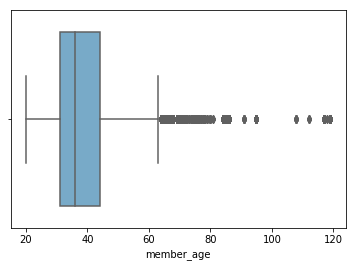

In [23]:
sb.boxplot(x='member_age', data=df, palette='Blues', orient='h')

  * There are outliers in the ages. We will discard these abnormal ages since we are more interested in bikers age from 20 to 60. 

In [24]:
df=df[df['member_age'] <=60]

  * The mean age is 37 years old

In [25]:
np.mean(df.member_age)

37.13280594367351

In [26]:
##### We don't need the birth year anymore.
df.drop(['member_birth_year'], axis=1, inplace=True)

In [27]:
#### This is a bokeh graph plot which is intereactive. Feel free to see it's feature.

p=figure(height=200)
p.diamond_cross(x=df.member_age , y=df.duration_sec)
show(p)


#### Finding daily number of bike rides 

In [27]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

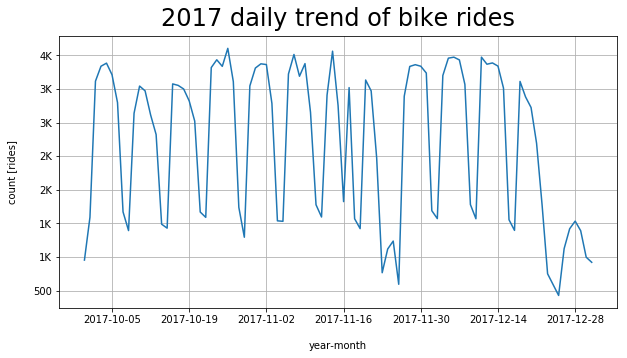

In [28]:
df.groupby('start_time_date').agg('count')['bike_id'].plot(kind = 'line', figsize = [10, 5])
plt.title('2017 daily trend of bike rides', fontsize=24, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('pic1.png')


  * As you can see, the daily trends of cyclists rose up until around November and  December

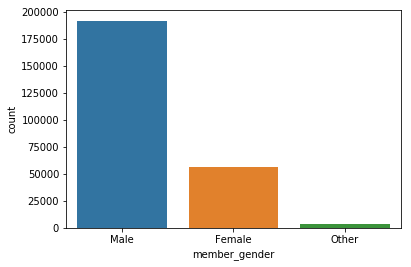

In [29]:
sb.countplot(data = df, x = 'member_gender')
plt.savefig('pic2.png')

  * There are significantly more males cyclists than females and other genders.


In [30]:
trip_by_weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100


In [31]:
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

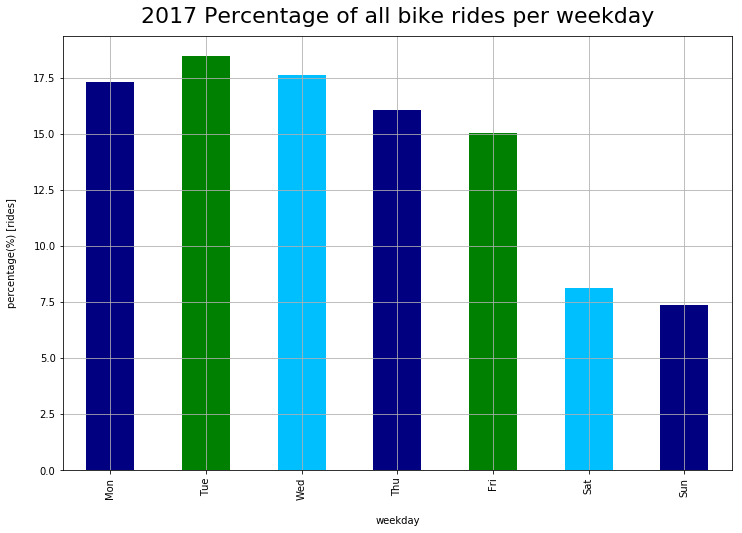

In [32]:
new_color = ['navy', 'green', 'deepskyblue', 'navy', 'green', 'deepskyblue', 'navy']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('2017 Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.savefig('pic3.png')
plt.grid()


In [33]:
trip_by_weekday_df.describe()

,bike_id,perc
count,7.000000,7.000000
mean,35918.142857,14.285714
std,11600.058109,4.613688
min,18485.000000,7.352035
25%,29111.500000,11.578510
50%,40418.000000,16.075441
75%,43954.000000,17.481814
max,46393.000000,18.451877


  * It looks like the most popular days that cyclists ride their bikes is tuesday and next, wednesday.

#### Age Groups bikers per month

  * Creating age groups of cyclists.

In [34]:

df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 60' if 50<x<=60
                                                  else x)


In [35]:
df.member_age_bins.head(5)

0     31 - 40
1     51 - 60
4     21 - 30
6     21 - 30
12    21 - 30
Name: member_age_bins, dtype: object

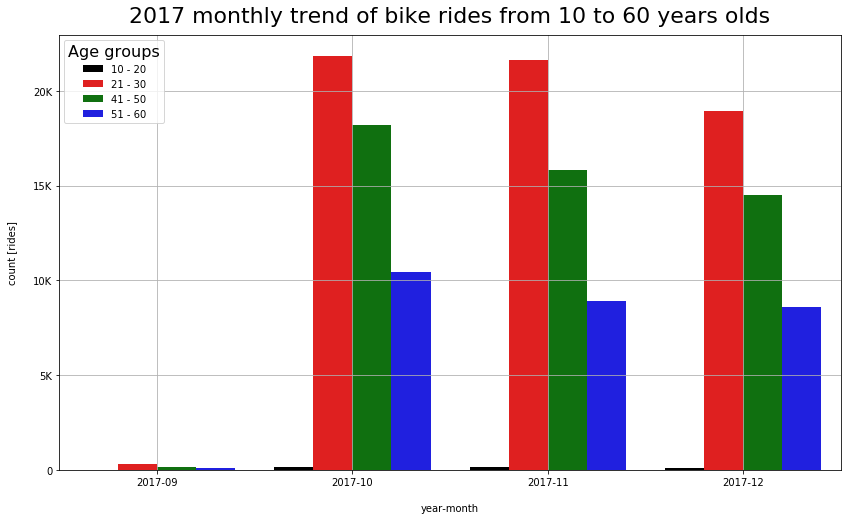

In [36]:
plt.figure(figsize=(14,8))
my_palette = {'10 - 20': 'black', '21 - 30': 'red', '31 - 40': 'blue', '41 - 50': 'green','51 - 60': 'blue'}
ax = sb.countplot(x='start_time_year_month', hue='member_age_bins', palette=my_palette,
                   data=df[df['member_age_bins'].isin(['10 - 20','21 - 30', '31 - 41', '41 - 50', '51 - 60'])].sort_values(by=['start_time_year_month', 'member_age_bins']))
plt.title('2017 monthly trend of bike rides from 10 to 60 years olds', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Age groups',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('pic4.png')



  * We conclude that many of cyclists age lies between the ages of 20 - 30

In [37]:

trip_by_hour = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

In [38]:
trip_by_hour['bike_id'] = (trip_by_hour['bike_id']/trip_by_hour['bike_id'].sum())*100

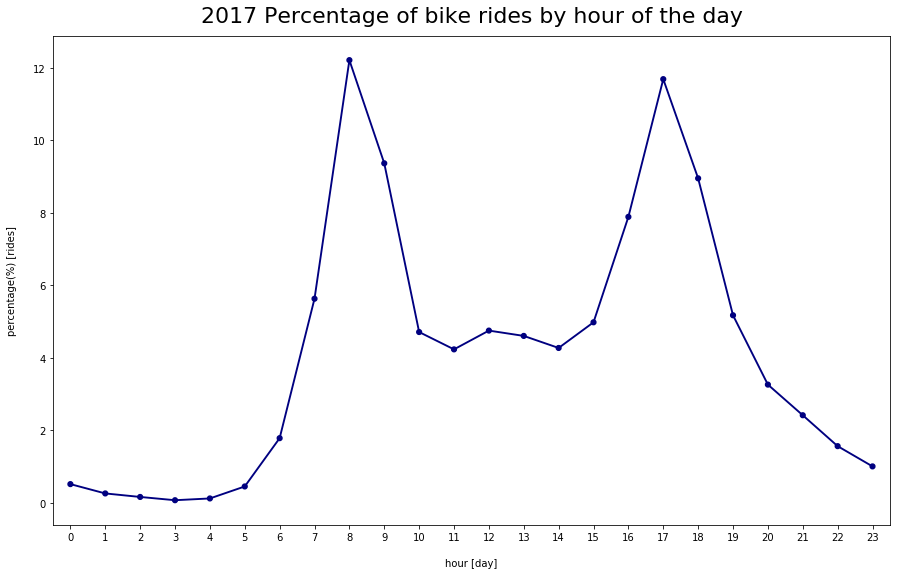

In [39]:
plt.figure(figsize=(15,9))
sb.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='navy', data=trip_by_hour)
plt.title('2017 Percentage of bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.savefig('pic5.png')


  * The most frequent rides is between  8am - 9am when people go to work and at 5pm when returning from work.

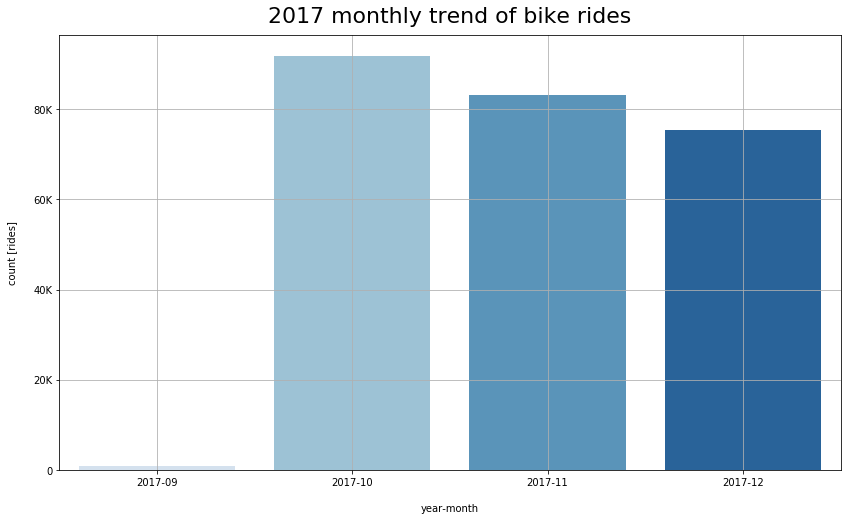

In [41]:
plt.figure(figsize=(14,8))
sb.countplot(x='start_time_year_month', palette="Blues", 
             data=df.sort_values(by='start_time_year_month'))
plt.title('2017 monthly trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('pic6.jpg')

  * As you can see that the monthly frequent rides occur in the month of October and I am also assuming that there is very little rides shown for September is because there is not much data gathered for the month. When comparing rides in September, it jumped about 5 times.

#### Percentage of all bike rides per group

In [42]:

trip_by_age_df = df.groupby('member_age_bins').agg({'bike_id':'count'})


In [43]:

trip_by_age_df['perc'] = (trip_by_age_df['bike_id']/trip_by_age_df['bike_id'].sum())*100


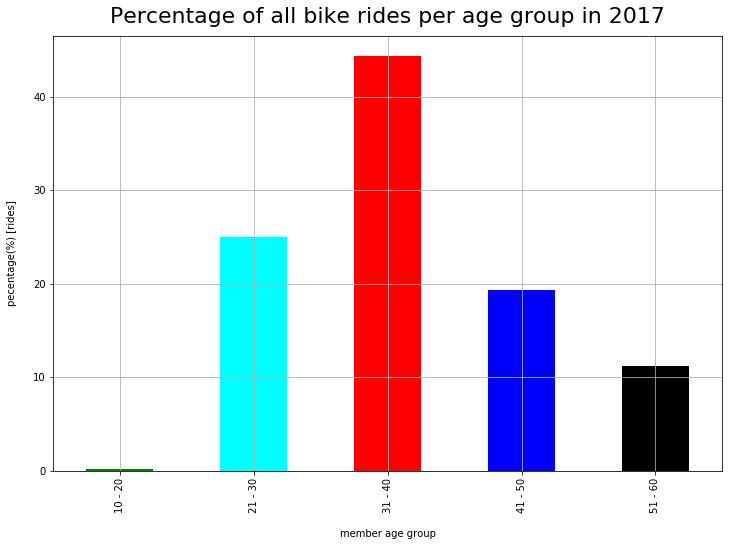

In [44]:

new_color = ['green','cyan', 'red', 'blue', 'black','green','magenta']
trip_by_age_df['perc'].plot(kind='bar', color=new_color, figsize=(12,8))
plt.title('Percentage of all bike rides per age group in 2017', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%) [rides]', labelpad=16)
plt.grid()
plt.savefig('pic7.jpg')

  * As we have predicted from our calculations earlier, our age of cyclists is between 31 - 40 years old. Our mean was 37 years old.

  * count of bike rides from subscribers and customers

In [45]:
count_of_rides_per_user_type = df.groupby('user_type').size().reset_index(name='count')


In [46]:
count_of_rides_per_user_type['count']/len(df)*100

0     9.342672
1    90.657328
Name: count, dtype: float64

In [47]:
user_type_count_per_year_df = df.groupby(["start_time_year_month", "user_type"]).size().reset_index()


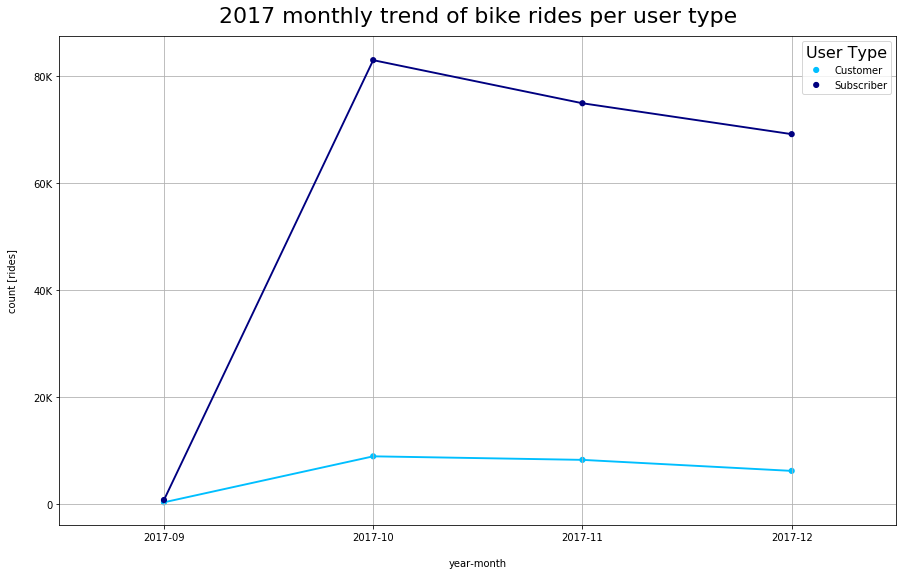

In [48]:

plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sb.pointplot(x='start_time_year_month', y=0, hue='user_type', palette=my_palette, scale=.7, 
                  data=user_type_count_per_year_df)
plt.title('2017 monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('pic8.jpg')


  * It looks like the Subscribers top the graph for the most user type.

In [49]:
df.start_time_year_month.head(5)

0     2017-12
1     2017-12
4     2017-12
6     2017-12
12    2017-12
Name: start_time_year_month, dtype: object

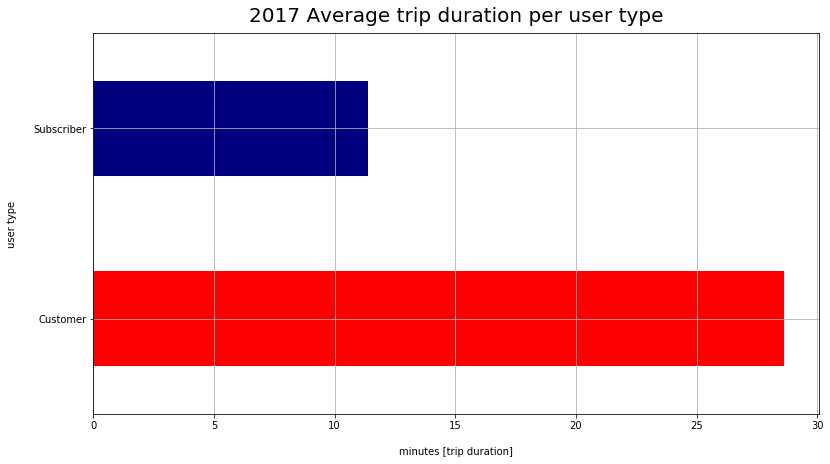

In [50]:
new_color=['red', 'navy']
ax = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('2017 Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)
plt.grid()
plt.savefig('pic9.jpg')



  * As we can deduce from this graph and the one previous, it is understandable that the subscribers has the most frequent rides is because they have shorter trips as opposed to the customerswho has less frequent rides since it takes them longer to ride to their destination.

In [51]:
subscriber_age_df = df[df['user_type']=='Subscriber'].groupby(['start_time_year_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()


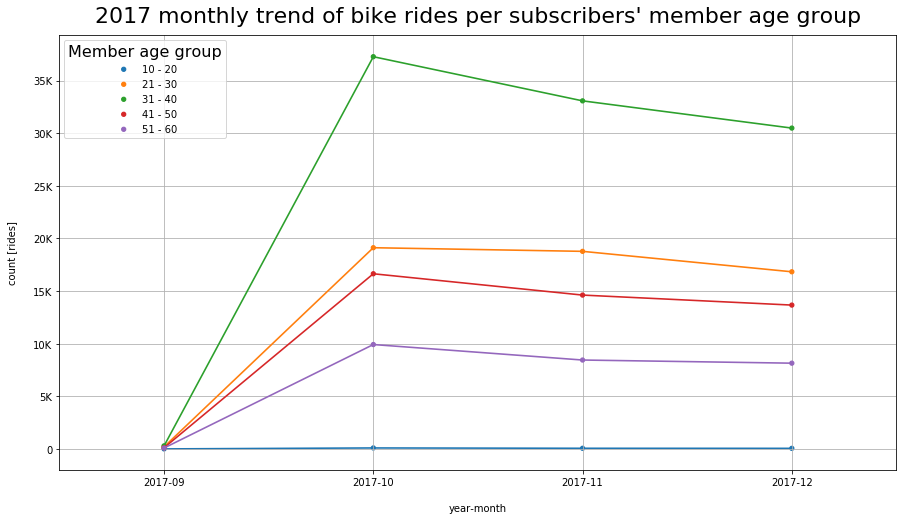

In [52]:
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='start_time_year_month', y='bike_id', hue='member_age_bins', 
                  scale=.6, data=subscriber_age_df)
plt.title("2017 monthly trend of bike rides per subscribers' member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('pic10.jpg')


  * As you can see, the age groups for both subscribers and customers has the same trends.

In [55]:
customer_age_df = df[df['user_type']=='Customer'].groupby(['start_time_year_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()


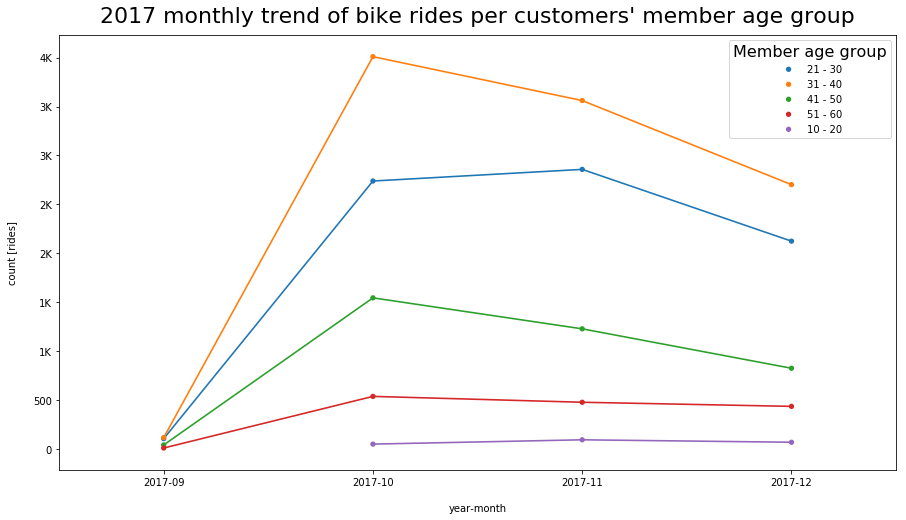

In [56]:
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='start_time_year_month', y='bike_id', hue='member_age_bins', 
                  scale=.6, data=customer_age_df)
plt.title("2017 monthly trend of bike rides per customers' member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('pic11.jpg')

In [57]:
df.distance_miles.describe()

count    251427.000000
mean          1.004863
std           0.618742
min           0.000000
25%           0.571264
50%           0.874867
75%           1.297036
max          38.707487
Name: distance_miles, dtype: float64

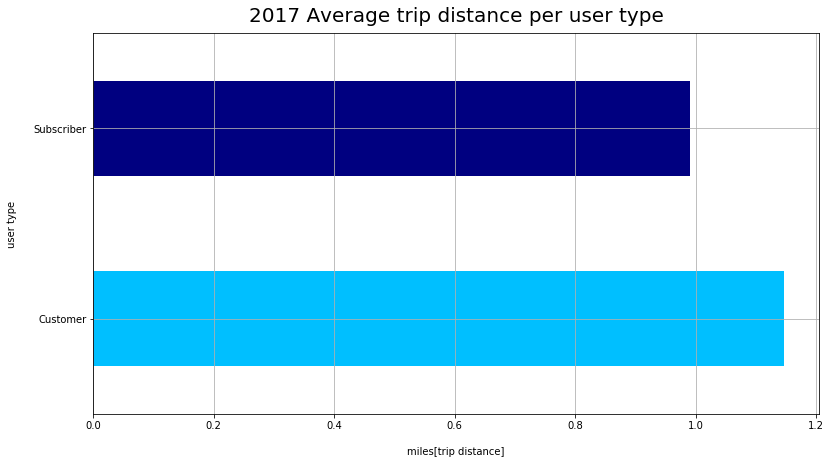

In [62]:
new_color=['deepskyblue', 'navy']
ax = df.groupby('user_type')['distance_miles'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('2017 Average trip distance per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('miles[trip distance]', labelpad=16)
plt.grid()
plt.savefig('pic12.jpg')


  * Average distance for customers are higher than subscribers


In [63]:
df.groupby('user_type')['distance_miles'].mean()

user_type
Customer      1.146800
Subscriber    0.990236
Name: distance_miles, dtype: float64

In [64]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,end_time_hour,start_time_weekday,end_time_weekday,start_time_weekday_abbr,end_time_weekday_abbr,duration_min,distance_km,distance_miles,member_age,member_age_bins
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,15,Sunday,Monday,Sun,Mon,1335.166667,0.942931,0.585910,32.0,31 - 40
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,13,Sunday,Monday,Sun,Mon,1313.333333,3.069727,1.907439,54.0,51 - 60
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,2,Sunday,Monday,Sun,Mon,726.716667,0.636339,0.395403,22.0,21 - 30
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,...,1,Sunday,Monday,Sun,Mon,75.116667,0.000000,0.000000,28.0,21 - 30
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,0,Sunday,Monday,Sun,Mon,36.383333,1.517348,0.942836,29.0,21 - 30


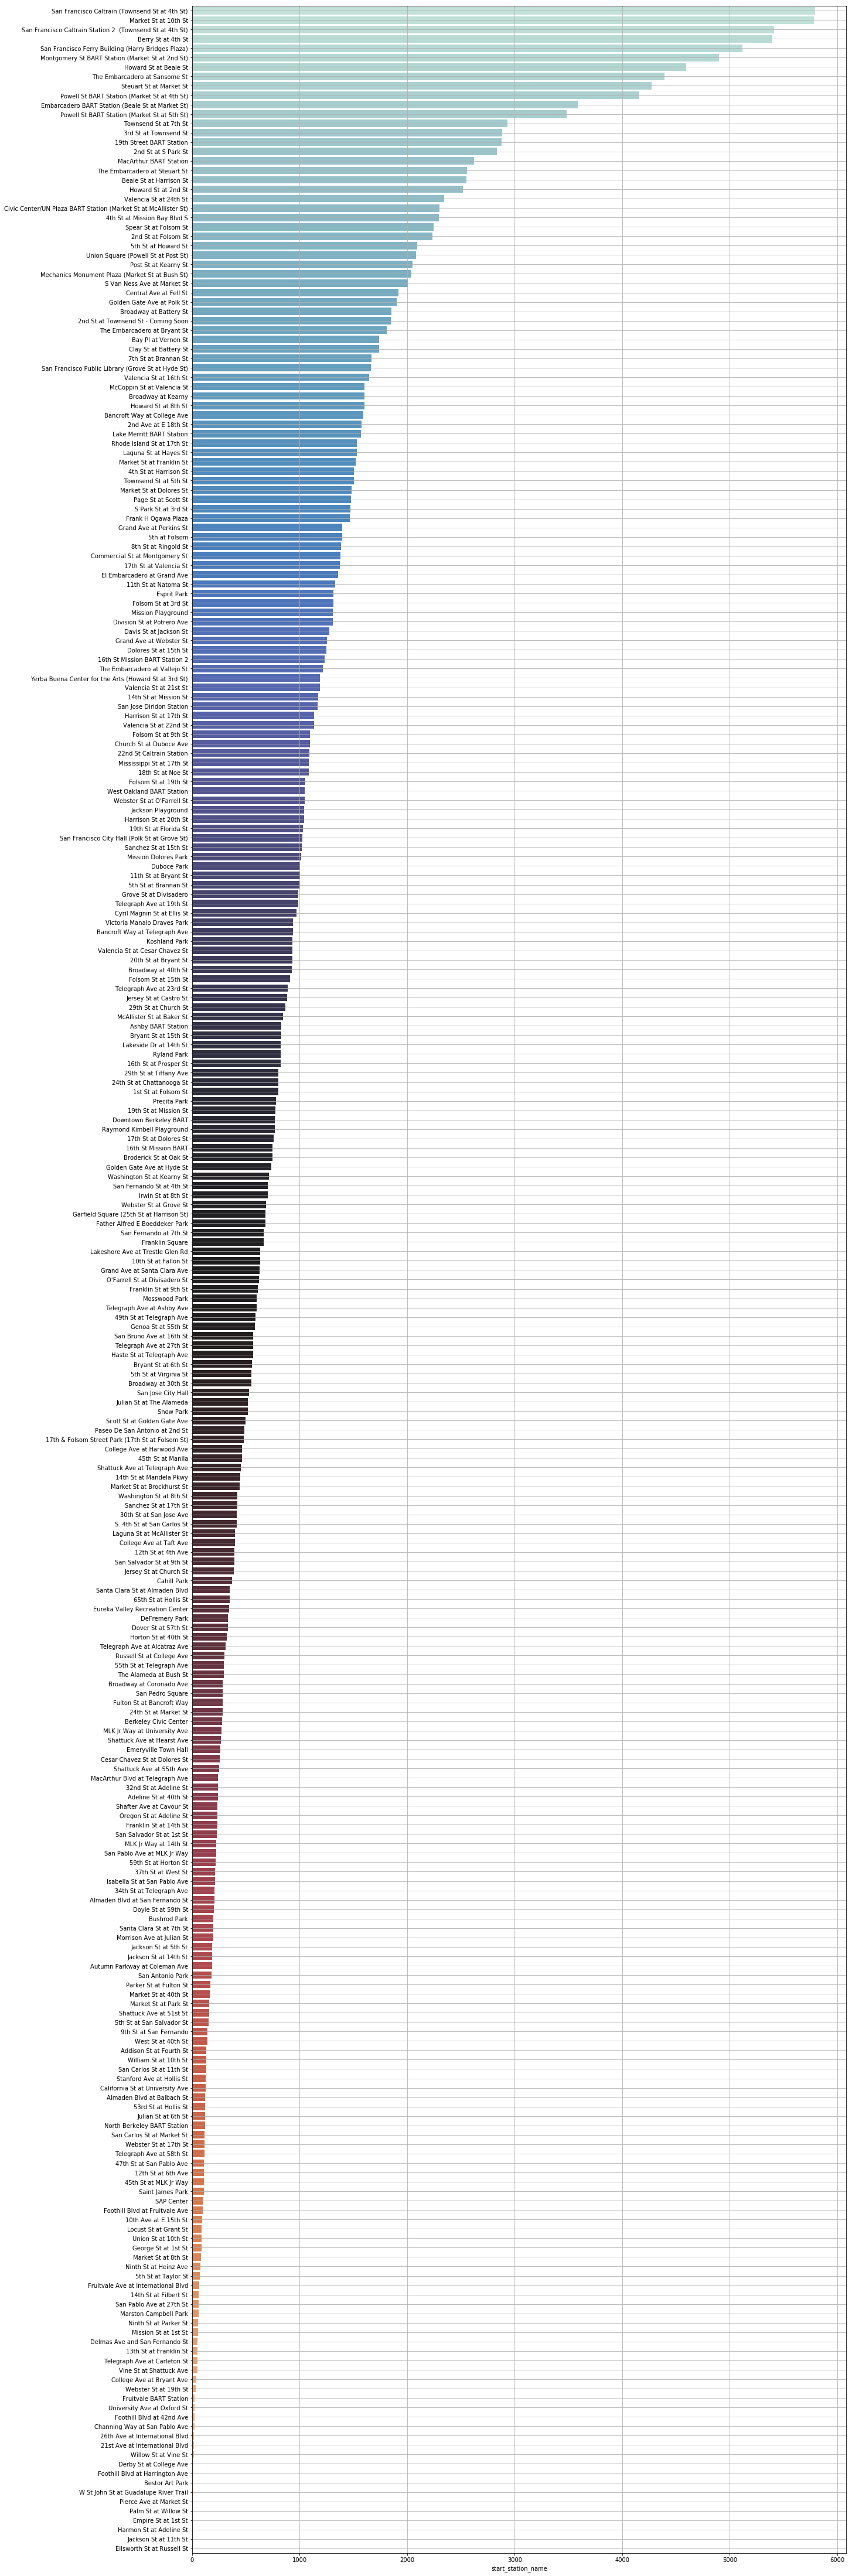

In [65]:
plt.figure(figsize=(20,80))
data=df.start_station_name.value_counts()
sb.barplot(y=data.index, x = data, orient='h',palette='icefire')
plt.grid()
plt.savefig('pic13.jpg')

In [68]:

top_50_popular_sttn = df.groupby(['start_station_name']).size().sort_values(ascending=False)[:50].to_frame().reset_index().start_station_name


In [69]:
print (top_50_popular_sttn)

0        San Francisco Caltrain (Townsend St at 4th St)
1                                  Market St at 10th St
2     San Francisco Caltrain Station 2  (Townsend St...
3                                    Berry St at 4th St
4     San Francisco Ferry Building (Harry Bridges Pl...
5      Montgomery St BART Station (Market St at 2nd St)
6                                 Howard St at Beale St
7                         The Embarcadero at Sansome St
8                               Steuart St at Market St
9          Powell St BART Station (Market St at 4th St)
10     Embarcadero BART Station (Beale St at Market St)
11         Powell St BART Station (Market St at 5th St)
12                                Townsend St at 7th St
13                                3rd St at Townsend St
14                             19th Street BART Station
15                                  2nd St at S Park St
16                               MacArthur BART Station
17                        The Embarcadero at Ste